In [17]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%run utility_functions.ipynb 

In [18]:
from qiskit_ionq import IonQProvider
provider = IonQProvider('MSZ3nHSUkWvLg4YucxMDpNDESpGqQx3i')
print(provider.backends()) 

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [20]:
def cloningcircuit(alice_bit = 0, alice_base = 0, theta1=np.pi/8):    
    
    qr = QuantumRegister(3,'q')
    cr = ClassicalRegister(3,'c')

    qc = QuantumCircuit(qr,cr)
    
    if alice_bit == 0:
        if alice_base == 0:
            pass
        else:
            qc.h(qr[0])
    elif alice_bit == 1:
        if alice_base == 0:
            qc.x(qr[0])
        else:
            qc.x(qr[0])
            qc.h(qr[0])

                
    qc.barrier()

    # theta1=theta3=np.pi/4
    # theta2 = -math.asin(0.5 - math.sqrt(2)/3) ** 0.5
#     theta2 = 0.5 * (np.arccos((np.cos(2*theta1))/(np.sin(2*theta1))))
    
    if theta1 <= np.pi/4:
        theta2 = 0.5 * np.arccos(np.cos(2*theta1)/np.sin(2*theta1))
    if theta1 > np.pi/4:
        theta2 = 0.5 * np.arccos(-np.cos(2*theta1)/np.sin(2*theta1))
        
    theta3 = np.arctan(np.tan(theta1) * np.tan(theta2))
    
#     print(theta1,theta2,theta3)
    
    #qc.sdg(y basis)
    
#     qc.u(2*theta1,0,0,qr[1])
    qc.ry(2*theta1,qr[1])
    qc.cx(qr[1],qr[2])
#     qc.u(2*theta2,0,0,qr[2])
    qc.ry(2*theta2,qr[2])
    qc.cx(qr[2],qr[1])
#     qc.u(2*theta3,0,0,qr[1])
    qc.ry(2*theta3,qr[1])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[2],qr[0])

    qc.barrier()
    
    if alice_base == 0:
        pass
    else:
        qc.h(qr[0])
        qc.h(qr[1])

    
    sim = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend=sim)
    result = job.result()
    sv = result.get_statevector()
    
    qc.measure([0,1],[0,1])
    
#     display(qc.draw(output='mpl'))
    return qc,sv

def displayresult(qc,sv,alice_bit=0,show=True,useIonQ=False):
    if not useIonQ:
        # define the backend
        backend= Aer.get_backend('qasm_simulator')
        # run the simulation
        job = execute(qc, backend=backend, shots = 1024)
        #get the result
        counts = job.result().get_counts()

    else:
        
        ionq = provider.get_backend("ionq_simulator")
        job = ionq.run(qc, backend=ionq, shots = 1024)
        counts = job.result().get_counts()
    
#     if show:
    print ("Counts:",counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/1024
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/1024
    
    print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
    if show:
#         print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
        # plot the histogram of the results
        display(plot_histogram(counts))
        display(plot_bloch_multivector(sv))
        display(array_to_latex(sv))
    
    return prob_bob, prob_alice, counts

In [19]:
theta1s = np.linspace(1.1,2.9,19)
print(theta1s)
theta1s = np.pi/8 * theta1s 

[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8
 2.9]


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-packages/qiskit_ionq/ionq_backend.py:314: UserWarning: Option backend is not used by this backend
  return super().run(circuit, **kwargs)


Counts: {'000': 608, '001': 239, '010': 166, '011': 11}
The probability of Bob measuring the correct bit is  0.755859375 and the probability of Alice eavesdropping the correct bit is 0.8271484375
Counts: {'000': 673, '001': 131, '010': 218, '011': 2}
The probability of Bob measuring the correct bit is  0.8701171875 and the probability of Alice eavesdropping the correct bit is 0.78515625
Counts: {'000': 672, '001': 122, '010': 230, '011': 0}
The probability of Bob measuring the correct bit is  0.880859375 and the probability of Alice eavesdropping the correct bit is 0.775390625
Counts: {'000': 683, '001': 78, '010': 261, '011': 2}
The probability of Bob measuring the correct bit is  0.921875 and the probability of Alice eavesdropping the correct bit is 0.7431640625
Counts: {'000': 681, '001': 51, '010': 289, '011': 3}
The probability of Bob measuring the correct bit is  0.947265625 and the probability of Alice eavesdropping the correct bit is 0.71484375
Counts: {'000': 642, '001': 23, '

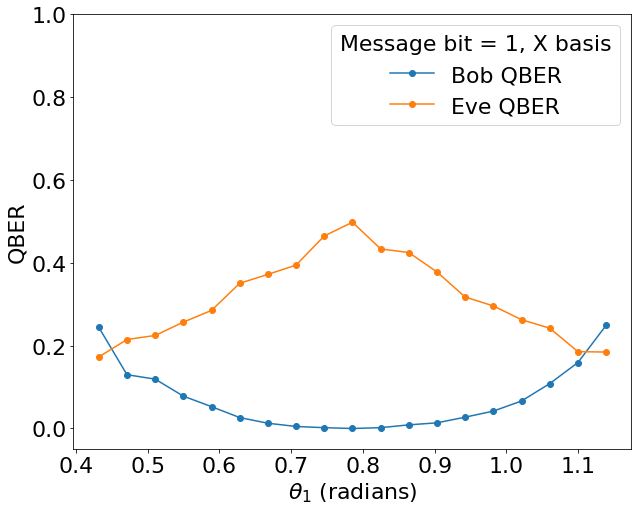

In [21]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

counts_list = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice,counts = displayresult(qc,sv,alice_bit=0,show=False,useIonQ=True)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)
    
    counts_list.append(counts)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 1, X basis")
plt.show()

In [22]:
probbob_theory = []
probalice_theory = []
errbob_theory = []
erralice_theory = []

for val in theta1s:
    probbob_theory.append(0.5 * (1 + np.sin(2 * val)))
    probalice_theory.append(0.5 * (1 + np.abs(np.cos(2 * val))))
    errbob_theory.append(1 - (0.5 * (1 + np.sin(2 * val))))
    erralice_theory.append(1 - (0.5 * (1 + np.abs(np.cos(2 * val)))))
    

In [23]:
def submitjob(alice_bit=0,theta1=0.75):
    
    qc, sv = cloningcircuit(alice_bit = alice_bit, alice_base = 1, theta1=theta1)
    display(qc.draw(output='mpl'))
    ionq = provider.get_backend("ionq_qpu")
    job = ionq.run(qc, backend=ionq, shots = 1024)
    
    return job.job_id()
#     counts = job.result().get_counts() 

In [28]:
def getjobresult(id = "",alice_bit=0):
    ionq = provider.get_backend("ionq_qpu")
    retrieved = ionq.retrieve_job(id) 
    counts = retrieved.result().get_counts()
#     print(counts)
#     plot_histogram(counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/1024
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/1024

        err_bob = 1 - prob_bob
        err_alice = 1 - prob_alice
            
    return prob_bob, prob_alice, err_bob, err_alice, counts

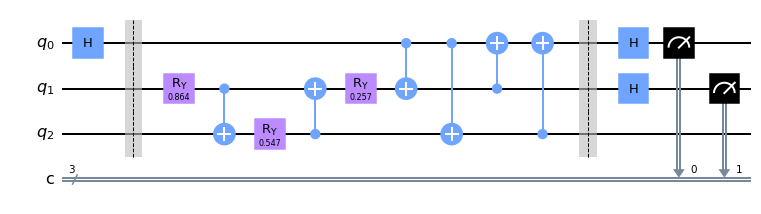

/var/folders/sj/fp0zy3yj7434w2klc5mh_6sw0000gn/T/ipykernel_21799/2351231624.py:6: UserWarning: Option backend is not used by this backend
  job = ionq.run(qc, backend=ionq, shots = 1024)


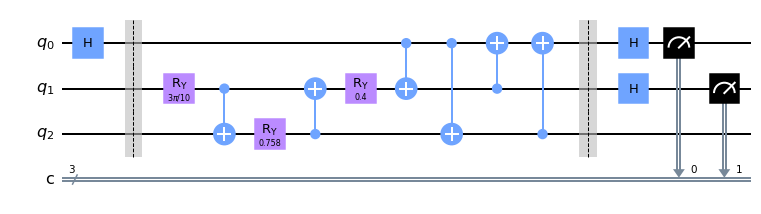

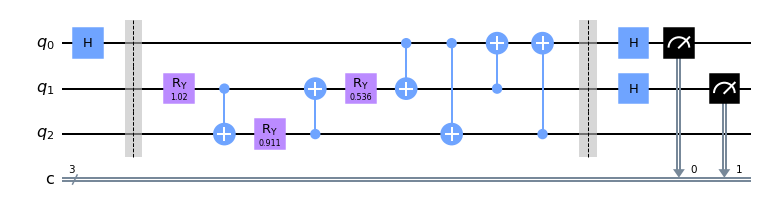

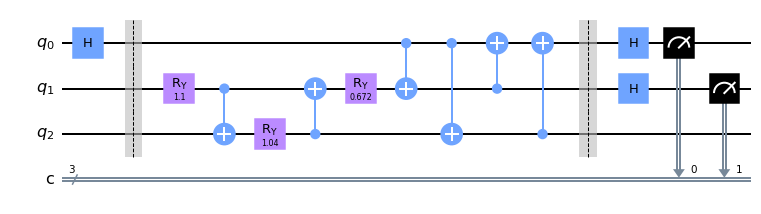

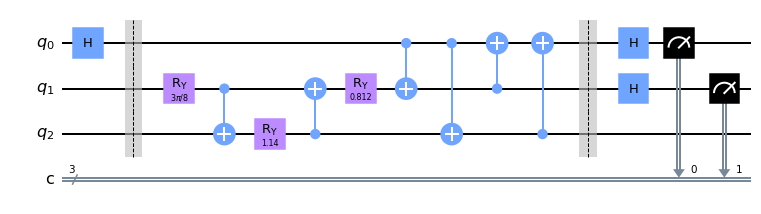

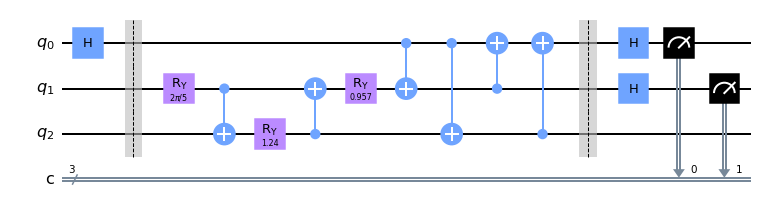

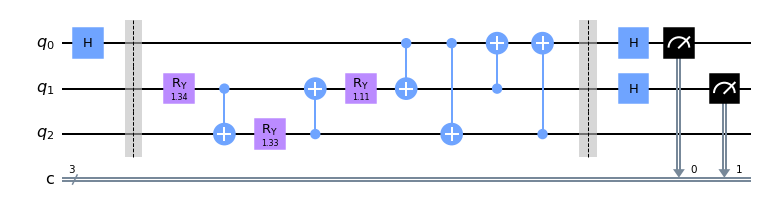

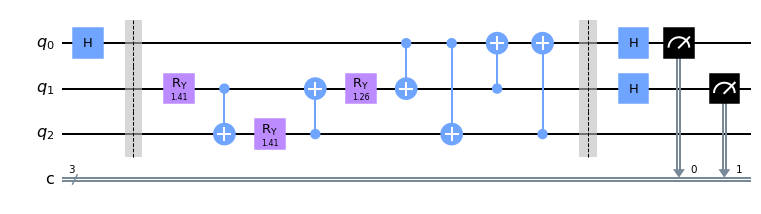

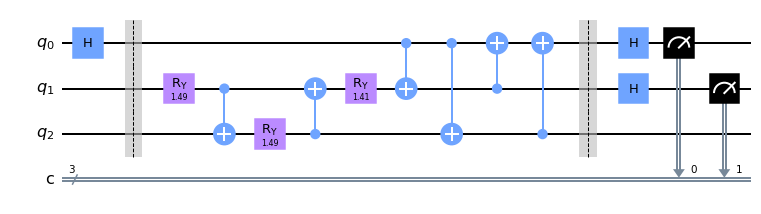

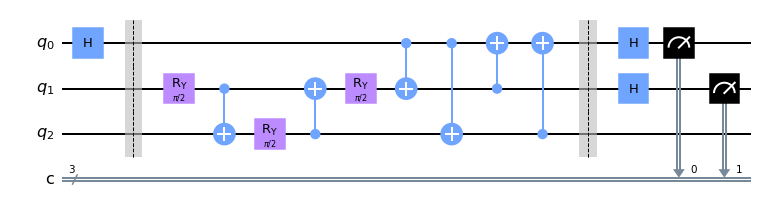

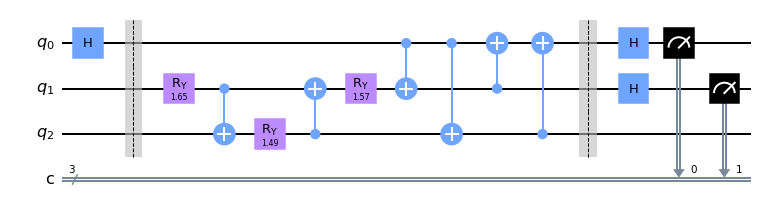

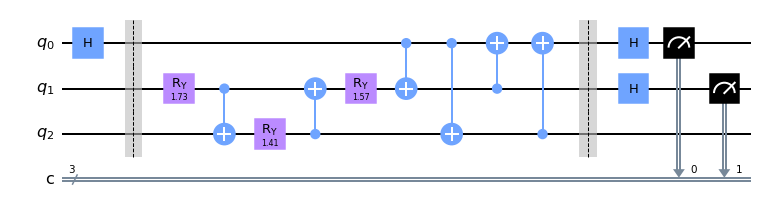

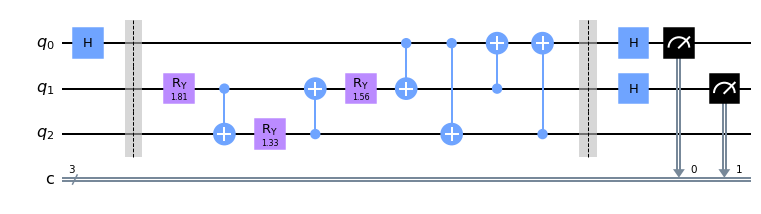

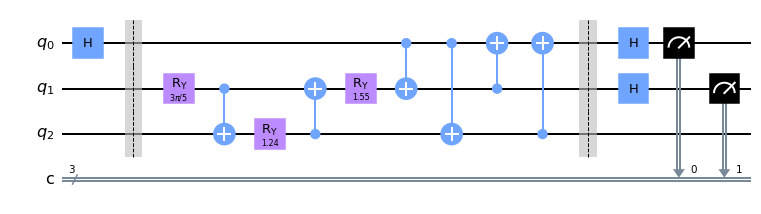

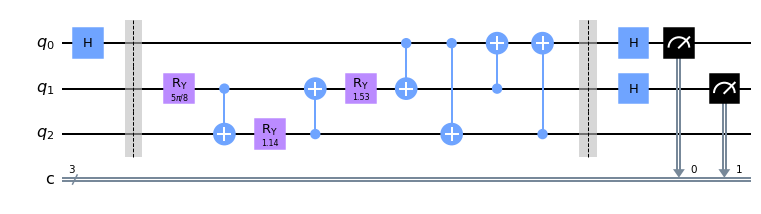

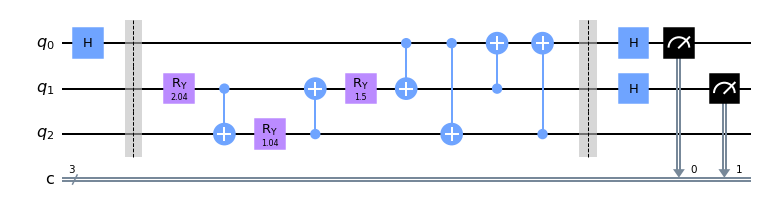

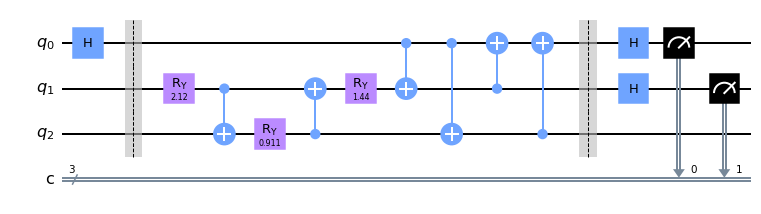

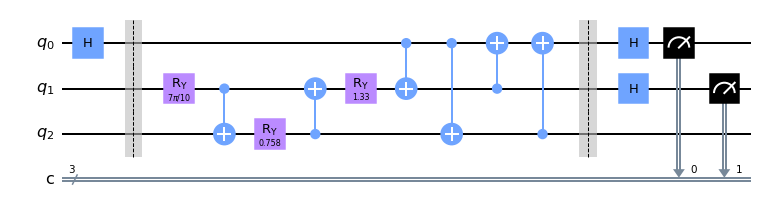

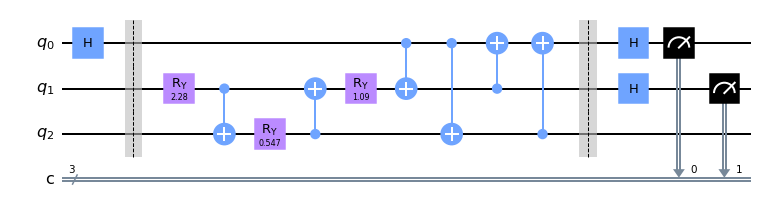

In [10]:
jobs = []
for val in theta1s:
    job = submitjob(alice_bit=0,theta1=val)
    jobs.append(job)

In [25]:
jobs = ['8ed0c103-a6e4-4765-a190-f11a9d4b9eef',
 '07b07d24-013c-43aa-a881-9b5819e0bbdd',
 '55aeaf37-dee6-4012-9705-a67b1d88e7a3',
 '09853a97-5155-4408-9cad-062ae0a89e6f',
 'f39cf70f-d5c2-494a-8395-334b5ca24dfa',
 '5ef9a3be-e352-49f6-8d2f-eeb7d28e96f1',
 '462e53b2-798a-41aa-8b56-919e4ea7c6ad',
 '3cecadf8-00c1-4345-93fb-a4bef2a54c11',
 '8dd50b62-ac04-4b6c-b78e-bcdab252aa50',
 '53a19807-d74f-4057-ade4-4efa385156d2',
 'cd4fd0dc-8925-4f4a-9ce1-39f104649b5c',
 '9ccf5257-219e-4879-860f-3a91d875963c',
 'b866474c-f640-4d9b-a38c-250072514811',
 '216ec029-40e3-457a-9ea7-40b61c1ee1a1',
 '5ced32d9-407f-41aa-925a-1ef2d6473c11',
 'e837b0ff-b7f6-4de0-9b1f-df7d505f6d39',
 '3aa38d11-c3d9-4b0d-a1f6-228b9ae86eca',
 '4da7c13b-4068-46fe-9166-21cf37652245',
 '6b4c0841-cd2d-499c-955b-507166caa23d']

jobs

['8ed0c103-a6e4-4765-a190-f11a9d4b9eef',
 '07b07d24-013c-43aa-a881-9b5819e0bbdd',
 '55aeaf37-dee6-4012-9705-a67b1d88e7a3',
 '09853a97-5155-4408-9cad-062ae0a89e6f',
 'f39cf70f-d5c2-494a-8395-334b5ca24dfa',
 '5ef9a3be-e352-49f6-8d2f-eeb7d28e96f1',
 '462e53b2-798a-41aa-8b56-919e4ea7c6ad',
 '3cecadf8-00c1-4345-93fb-a4bef2a54c11',
 '8dd50b62-ac04-4b6c-b78e-bcdab252aa50',
 '53a19807-d74f-4057-ade4-4efa385156d2',
 'cd4fd0dc-8925-4f4a-9ce1-39f104649b5c',
 '9ccf5257-219e-4879-860f-3a91d875963c',
 'b866474c-f640-4d9b-a38c-250072514811',
 '216ec029-40e3-457a-9ea7-40b61c1ee1a1',
 '5ced32d9-407f-41aa-925a-1ef2d6473c11',
 'e837b0ff-b7f6-4de0-9b1f-df7d505f6d39',
 '3aa38d11-c3d9-4b0d-a1f6-228b9ae86eca',
 '4da7c13b-4068-46fe-9166-21cf37652245',
 '6b4c0841-cd2d-499c-955b-507166caa23d']

In [29]:
err_bob_list = []
err_alice_list = []

for i in range(len(jobs)):
    prob_bob, prob_alice, err_bob, err_alice, counts = getjobresult(id = jobs[i],alice_bit=0)
    print(i, prob_bob, prob_alice, err_bob, err_alice, counts)
    
    err_bob_list.append(err_bob)
    err_alice_list.append(err_alice) 

0 0.7001953125 0.765625 0.2998046875 0.234375 {'000': 541, '001': 243, '010': 176, '011': 64}
1 0.767578125 0.7685546875 0.232421875 0.2314453125 {'000': 601, '001': 186, '010': 185, '011': 52}
2 0.841796875 0.7509765625 0.158203125 0.2490234375 {'000': 642, '001': 127, '010': 220, '011': 35}
3 0.8603515625 0.7080078125 0.1396484375 0.2919921875 {'000': 618, '001': 107, '010': 263, '011': 36}
4 0.91796875 0.724609375 0.08203125 0.275390625 {'000': 681, '001': 61, '010': 259, '011': 23}
5 0.8837890625 0.5986328125 0.1162109375 0.4013671875 {'000': 541, '001': 72, '010': 364, '011': 47}
6 0.8828125 0.6015625 0.1171875 0.3984375 {'000': 545, '001': 71, '010': 359, '011': 49}
7 0.8984375 0.55078125 0.1015625 0.44921875 {'000': 502, '001': 62, '010': 418, '011': 42}
8 0.9052734375 0.505859375 0.0947265625 0.494140625 {'000': 462, '001': 56, '010': 465, '011': 41}
9 0.943359375 0.5224609375 0.056640625 0.4775390625 {'000': 509, '001': 26, '010': 457, '011': 32}
10 0.91015625 0.5458984375 0.0

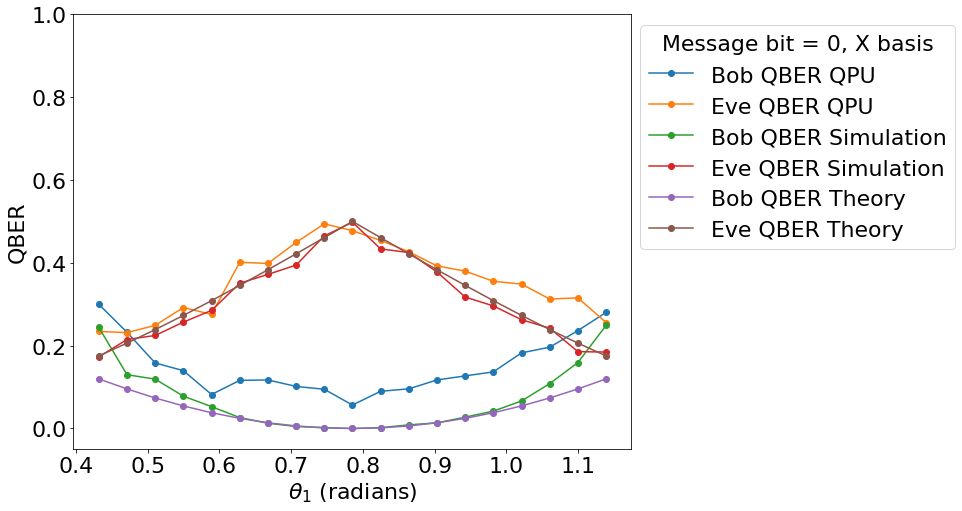

In [31]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bob_list,"-o",label="Bob QBER QPU")
plt.plot(theta1s,err_alice_list,"-o",label="Eve QBER QPU")

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER Simulation")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER Simulation")


plt.plot(theta1s,errbob_theory,"-o",label="Bob QBER Theory")
plt.plot(theta1s,erralice_theory,"-o",label="Eve QBER Theory")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis", bbox_to_anchor=(1.6,1))
plt.show()